# MA 531-001, Fall 2025, Homework 1
## Problem 4
*Modify the code from class to solve the following initial value problems numerically using both the backward and forward Euler method. Choose a step size which is appropriate, and compare with the exact analytical solutions. Also plot the solution found by a standard ODE solver, such as odeint in python.*
1. $\dot{x}(t) = (2t+1) \cdot x(t)$, &emsp; &emsp; $x(0) = 2$, for $t\in[0,5]$
2. $\dot{x}(t) = x+sin(t)$, &emsp; &emsp; $x(0) = -\frac{1}{2}$, for $t\in[0,5]$
$$x_{i+1} = x_i + h(a(t_{i+1})x_{i+1} + g(t_{i+1}))$$

In [9]:
# Requirements
import numpy as np
import matplotlib.pyplot as plt

### 1. $\dot{x}(t) = (2t+1) \cdot x(t)$, &emsp; &emsp; $x(0) = 2$, for $t\in[0,5]$


#### Backward Euler

10


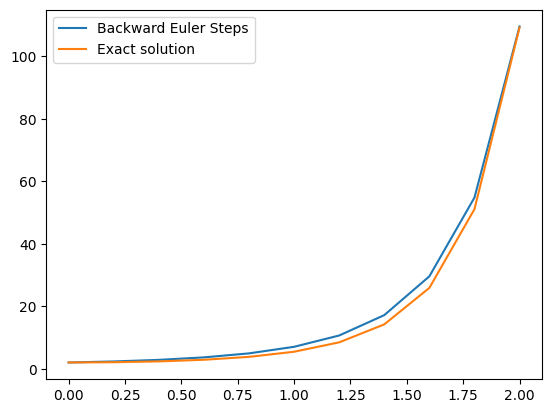

In [50]:
tfin=2
h  =.1

num_steps = int(np.ceil(1./h)) #The np.ceil is defensive coding: what if h doesn't divide [0,1] evenly
print(num_steps)
t = np.linspace(0,tfin,num_steps+1)
h = 1./num_steps #This updates h to account for the possibility that it changed due to np.ceil.

# set x to empty vector
x = np.zeros(t.shape)

# x(0) = 2
x0 = 2
x[0] = x0
for i in range(len(x)-1):
    x[i+1] = x[i]/(1-h*(2*t[i+1]+1))

exact_solution = 2 * np.exp(t**2)

# plot backward euler and exact solution
fig, ax = plt.subplots()

line1, = ax.plot(t, x, label='Backward Euler Steps')
line2, = ax.plot(t,exact_solution, label='Exact solution')
ax.legend()
plt.show()

#### Forward Euler

10


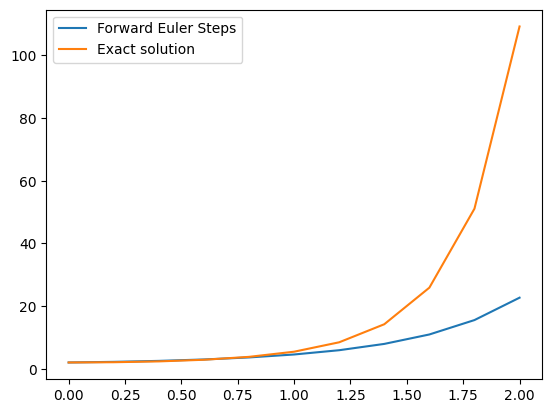

In [51]:
tfin=2
h  =.1

num_steps = int(np.ceil(1./h)) #The np.ceil is defensive coding: what if h doesn't divide [0,1] evenly
print(num_steps)
t = np.linspace(0,tfin,num_steps+1)
t_ode=np.linspace(0,tfin,1000)
h = 1./num_steps #This updates h to account for the possibility that it changed due to np.ceil.

# set x to empty vector
x = np.zeros(t.shape)

# x(0) = 2
x0 = 2
x[0] = x0
for i in range(len(x)-1):
    x[i+1] = x[i] + h*(2*t[i]+1)*x[i]

exact_solution = 2 * np.exp(t**2)

# plot forward euler and exact solution
fig, ax = plt.subplots()

line1, = ax.plot(t, x, label='Forward Euler Steps')
line2, = ax.plot(t,exact_solution, label='Exact solution')
ax.legend()
plt.show()

#### ODE Solver

100


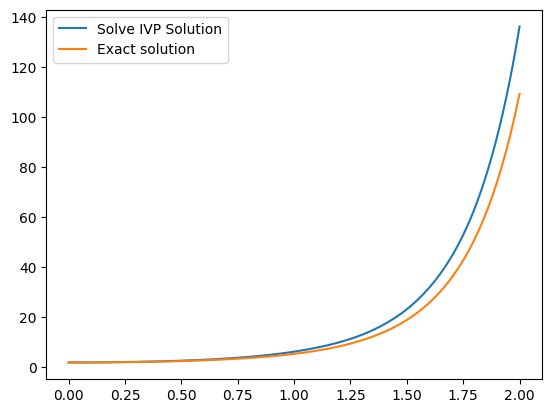

In [53]:
tfin=2
h  =.01

num_steps = int(np.ceil(1./h)) #The np.ceil is defensive coding: what if h doesn't divide [0,1] evenly
print(num_steps)
t = np.linspace(0,tfin,num_steps+1)
t_ode=np.linspace(0,tfin,1000)
h = 1./num_steps #This updates h to account for the possibility that it changed due to np.ceil.

# set x to empty vector
x = np.zeros(t.shape)

# x(0) = 2
x0 = 2
x[0] = x0

exact_solution = 2 * np.exp(t**2)

def ODE1(x,t):
    return (2*t+1)*x

xoi = solve_ivp(ODE1, (0,tfin), [x0], t_eval=t_ode).y[0]

# plot solve_ivp and exact solution
fig, ax = plt.subplots()

line1, = ax.plot(t_ode, xoi, label='Solve IVP Solution')
line2, = ax.plot(t,exact_solution, label='Exact solution')
ax.legend()
plt.show()

### 2. $\dot{x}(t) = x+sin(t)$, &emsp; &emsp; $x(0) = -\frac{1}{2}$, for $t\in[0,5]$